# Advanced Machine Learning
## Exercise 3

In [48]:
import numpy as np
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import zero_one_loss

import numpy as np

from matplotlib import pyplot as plt

---
### Population Data Set

In [49]:
N = int(1e5)
X, y = make_circles(N, noise=0.15, factor=0.2)

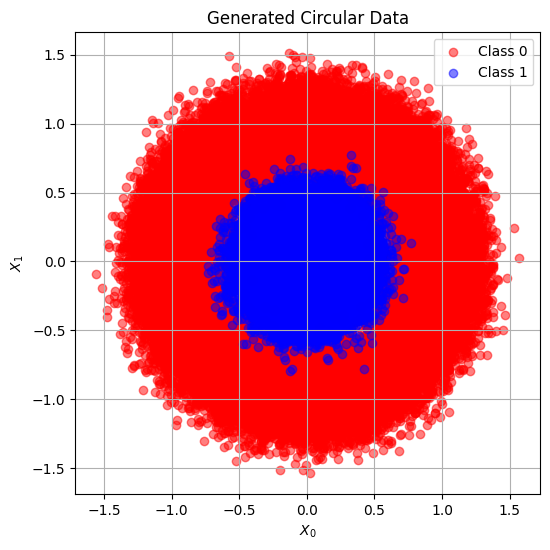

In [50]:
plt.figure(figsize=(6, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', alpha=0.5, label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', alpha=0.5, label='Class 1')
plt.legend()
plt.title('Generated Circular Data')
plt.xlabel('$X_0$')
plt.ylabel('$X_1$')
plt.grid(True)
plt.show()

## Hoeffding's Inequality:
$$
R_n (f) - \sqrt{- \frac{ln( \delta / 2)}{2n}} \leq R(f) \leq R_n (f) + \sqrt{- \frac{ln( \delta / 2)}{2n}}
$$

Training a Support Vector Classifier on a randomly drawn training set of size $n=100$.

In [51]:
n = 100

X_train, X_temp, y_train, y_temp = train_test_split(X, y, train_size=n, stratify=y, random_state=42)
print(f"{X_train.shape=}\n{y_train.shape=}")

X_train.shape=(100, 2)
y_train.shape=(100,)


In [52]:
clf = SVC(kernel='rbf')
clf.fit(X_train, y_train)

SVC()

In [53]:
y_hat = clf.predict(X)

true_risk = zero_one_loss(y, y_hat)
print(f'True Risk: {true_risk*100:.3f} %')

True Risk: 0.621 %


In [78]:
T = 50

empirical_risks = np.zeros(T)
error_bounds = np.zeros((T, 2))

for i in range(T):
	X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=n, stratify=y)

	y_hat = clf.predict(X_test)
	empirical_risk = zero_one_loss(y_test, y_hat)

	empirical_risks[i] = empirical_risk
	delta = 0.5
	term = np.sqrt(- np.log( delta / 2) / ( 2*n ) )
	error_bounds[i, 0] = empirical_risk - term
	error_bounds[i, 1] = empirical_risk + term

avg_lower_error_bounds = np.average(error_bounds[:,0])
avg_upper_error_bounds = np.average(error_bounds[:,1])

In [81]:
def compute_bounds(
		n: int,
		T=50
):
    empirical_risks = np.zeros(T)
    error_bounds = np.zeros((T, 2))

    for i in range(T):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=n, stratify=y)
        # clf.fit(X_train, y_train)  # Ensure to retrain the classifier on the new training set
        y_hat = clf.predict(X_test)
        empirical_risk = zero_one_loss(y_test, y_hat)

        empirical_risks[i] = empirical_risk
        delta = 0.5
        term = np.sqrt(- np.log(delta / 2) / (2 * n))
        error_bounds[i, 0] = empirical_risk - term
        error_bounds[i, 1] = empirical_risk + term

    avg_lower_error_bounds = np.average(error_bounds[:, 0])
    avg_upper_error_bounds = np.average(error_bounds[:, 1])

    return avg_lower_error_bounds, avg_upper_error_bounds

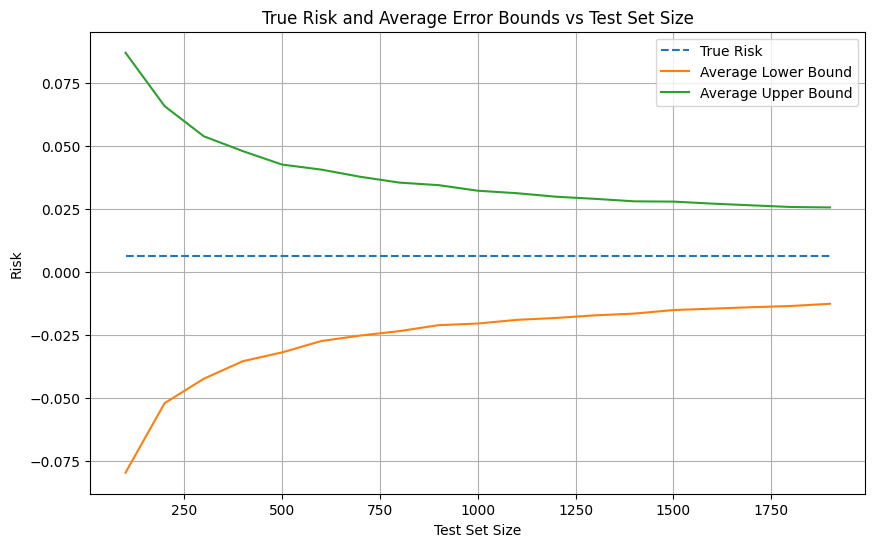

In [84]:
# test_sizes = np.linspace(10, N, 100)
test_sizes = np.arange(start=100, stop=2_000, step=100)
avg_lower_bounds = []
avg_upper_bounds = []

for n in test_sizes:
    lower, upper = compute_bounds(int(n))
    avg_lower_bounds.append(lower)
    avg_upper_bounds.append(upper)

# Compute true risk using the entire dataset
y_pred_all = clf.predict(X)
true_risk = zero_one_loss(y, y_pred_all)

# Now plot the true risk and average error bounds
plt.figure(figsize=(10, 6))
plt.plot(test_sizes, [true_risk]*len(test_sizes), label='True Risk', linestyle='--')
plt.plot(test_sizes, avg_lower_bounds, label='Average Lower Bound')
plt.plot(test_sizes, avg_upper_bounds, label='Average Upper Bound')
plt.legend()
plt.xlabel('Test Set Size')
plt.ylabel('Risk')
plt.title('True Risk and Average Error Bounds vs Test Set Size')
plt.grid(True)
plt.show()